In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [2]:
df1 = pd.read_csv('cleaned_amazon.csv')
df1 = df1[['text', 'score']]
df1


,text,score
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
994,The screen does get smudged easily because it ...,0
995,What a piece of junk.. I lose more calls on th...,0
996,Item Does Not Match Picture.,0
997,The only thing that disappoint me is the infra...,0


IndexError: single positional indexer is out-of-bounds

In [3]:
df2 = pd.read_csv('cleaned_yelp.csv')
df2.loc[100:500]
df2

,text,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df3 = pd.read_csv('cleaned_imbd.csv')
df3.loc[100:600]

,text,score
100,Awful.,0
101,I don't think I've ever gone to a movie and di...,0
102,It was a good thing that the tickets only cost...,0
103,NOBODY identifies with these characters becaus...,0
104,"This is a bad film, with bad writing, and good...",0
...,...,...
596,It was clear that she had the range and abilit...,1
597,She carries the movie well.,1
598,Constantine gives everything the right intensi...,1
599,"It is wonderful and inspiring to watch, and I ...",1


In [5]:
result

NameError: name 'result' is not defined

Index(['text', 'score'], dtype='object')
Index(['text', 'score'], dtype='object')
Index(['text   ', 'score'], dtype='object')


In [5]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['text', 'score'], dtype='object')
Index(['text', 'score'], dtype='object')
Index(['text', 'score'], dtype='object')


In [6]:
result = pd.concat([df1, df2, df3], axis = 0, ignore_index=True)

In [7]:
result

,text,score
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
2741,I just got bored watching Jessice Lange take h...,0
2742,"Unfortunately, any virtue in this film's produ...",0
2743,"In a word, it is embarrassing.",0
2744,Exceptionally bad!,0


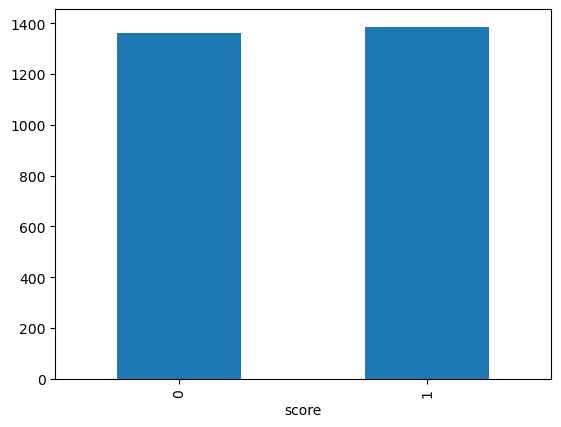

In [8]:
result.groupby('score').text.count().plot.bar(ylim = 0)

plt.show()

In [9]:
stemmer = PorterStemmer()

In [10]:
#cleaning dataset
nltk.download('stopwords')
words = stopwords.words("english")
result['cleaned'] = result['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,score,cleaned
0,"Good case, Excellent value.",1,good case excel valu
1,Great for the jawbone.,1,great jawbon
2,Tied to charger for conversations lasting more...,0,tie charger convers last minut major problem
3,The mic is great.,1,the mic great
4,I have to jiggle the plug to get it to line up...,0,i jiggl plug get line right get decent volum
...,...,...,...
2741,I just got bored watching Jessice Lange take h...,0,i got bore watch jessic lang take cloth
2742,"Unfortunately, any virtue in this film's produ...",0,unfortun virtu film product work lost regrett ...
2743,"In a word, it is embarrassing.",0,in word embarrass
2744,Exceptionally bad!,0,except bad


In [11]:
df = result[['cleaned', 'score']]
df

,cleaned,score
0,good case excel valu,1
1,great jawbon,1
2,tie charger convers last minut major problem,0
3,the mic great,1
4,i jiggl plug get line right get decent volum,0
...,...,...
2741,i got bore watch jessic lang take cloth,0
2742,unfortun virtu film product work lost regrett ...,0
2743,in word embarrass,0
2744,except bad,0


In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned']
Y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
#creating pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])
model = pipeline.fit(X_train, y_train)

In [42]:
y_test

1920    0
618     1
2548    1
787     1
1147    0
       ..
729     1
907     1
2546    1
969     0
1930    0
Name: score, Length: 412, dtype: int64

In [43]:
predict = model.predict(X_test)
predict
# if predict == 0:
#     print('Bad review!')
# else:
#     primt('God Review!')


array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,

In [52]:
data = {'review': [input('Enter the review = ')] for i in range(1)}
data = pd.DataFrame(data)
data
predict = model.predict(data['review'])
predict[0]

Enter the review = worst stake i have ever tasted


0